# <center style="color:red">Community detection in social network.</center>

### <center> <ins >Nguyễn Thị Thương<br><br>Nguyễn Ngọc Trí Vĩ <br><br>Nguyễn Bá Ngọc <br><br>

# <font color='blue'><u> Outline:</u></font> <br>

<font color = 'blue'>
    
> ####  [I. Libraries:](#1)

> ####  [II. Materials and Methods:](#2)

<a id = "1"></a><br>
# <font color='blue'><u> I. Libraries Used:</u></font> <br>


In [1]:
import pandas as pd
import numpy as np
import os
import glob
from sklearn import metrics
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import lil_matrix
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns

<a id = "2"></a><br>
# <font color='blue'><u> II. Materials and Methods:</u></font> <br>
> ## <font color='green'><u> Method 1:</u> Edge-based Approach</font> <br>
> > ### <font color='brown'><u> Graph represantation of data </u></font> <br>

In [3]:
directory = "twitter/" 

# Construct the file pattern to match
pattern = os.path.join(directory, "*.featnames")

# Get a list of filenames that match the pattern
filenames = glob.glob(pattern)

nodeIds = []
for filename in filenames:
    starting_index = filename.find("\\")+1
    ending_index = filename.find(".")
    nodeIds.append(int(filename[starting_index:ending_index]))

In [4]:
edges = []
edge_files = glob.glob(os.path.join(directory, "*.edges"))

for edge_file in edge_files:
    with open(edge_file, "r") as file:
        for line in file:
            source, target = line.strip().split()
            edges.append((int(source), int(target)))

In [5]:
selected_edges = []
for edge in edges:
    if (edge[0] in nodeIds) and (edge[1] in nodeIds):
        selected_edges.append(edge)
selected_edges

[(324201646, 40981798),
 (314316607, 430313102),
 (43003845, 314316607),
 (314316607, 187773078),
 (148519842, 195475105),
 (148519842, 86799233),
 (187773078, 314316607),
 (152388029, 158419434),
 (314316607, 43003845),
 (307458983, 18996905),
 (40981798, 18951737),
 (265077741, 40981798),
 (195475105, 43003845),
 (314316607, 307458983),
 (312284236, 40981798),
 (430313102, 18996905),
 (195475105, 187773078),
 (195475105, 148519842),
 (307458983, 158419434),
 (189875309, 148519842),
 (187773078, 40981798),
 (307458983, 166214735),
 (355823615, 43003845),
 (250340951, 18996905),
 (250340951, 430313102),
 (158419434, 40981798),
 (248883350, 229425177),
 (195475105, 206923844),
 (59588845, 43003845),
 (152388029, 355823615),
 (59588845, 70492333),
 (160237722, 314316607),
 (187773078, 307458983),
 (160237722, 18996905),
 (158419434, 430313102),
 (314316607, 229425177),
 (222090651, 57828817),
 (152388029, 40981798),
 (179138862, 18996905),
 (229425177, 40981798),
 (195475105, 248883350),

In [6]:
edges = selected_edges

In [7]:
# Step 2: Create a graph representation
graph = nx.Graph()
graph.add_edges_from(edges)

# Step 3: Plot a subset of the graph
subset_nodes = list(graph.nodes)[:1000]  # Select the first 1000 nodes for visualization

subset_graph = graph.subgraph(subset_nodes)

# Use Circular layout for better performance with large graphs
pos = nx.spring_layout(subset_graph)

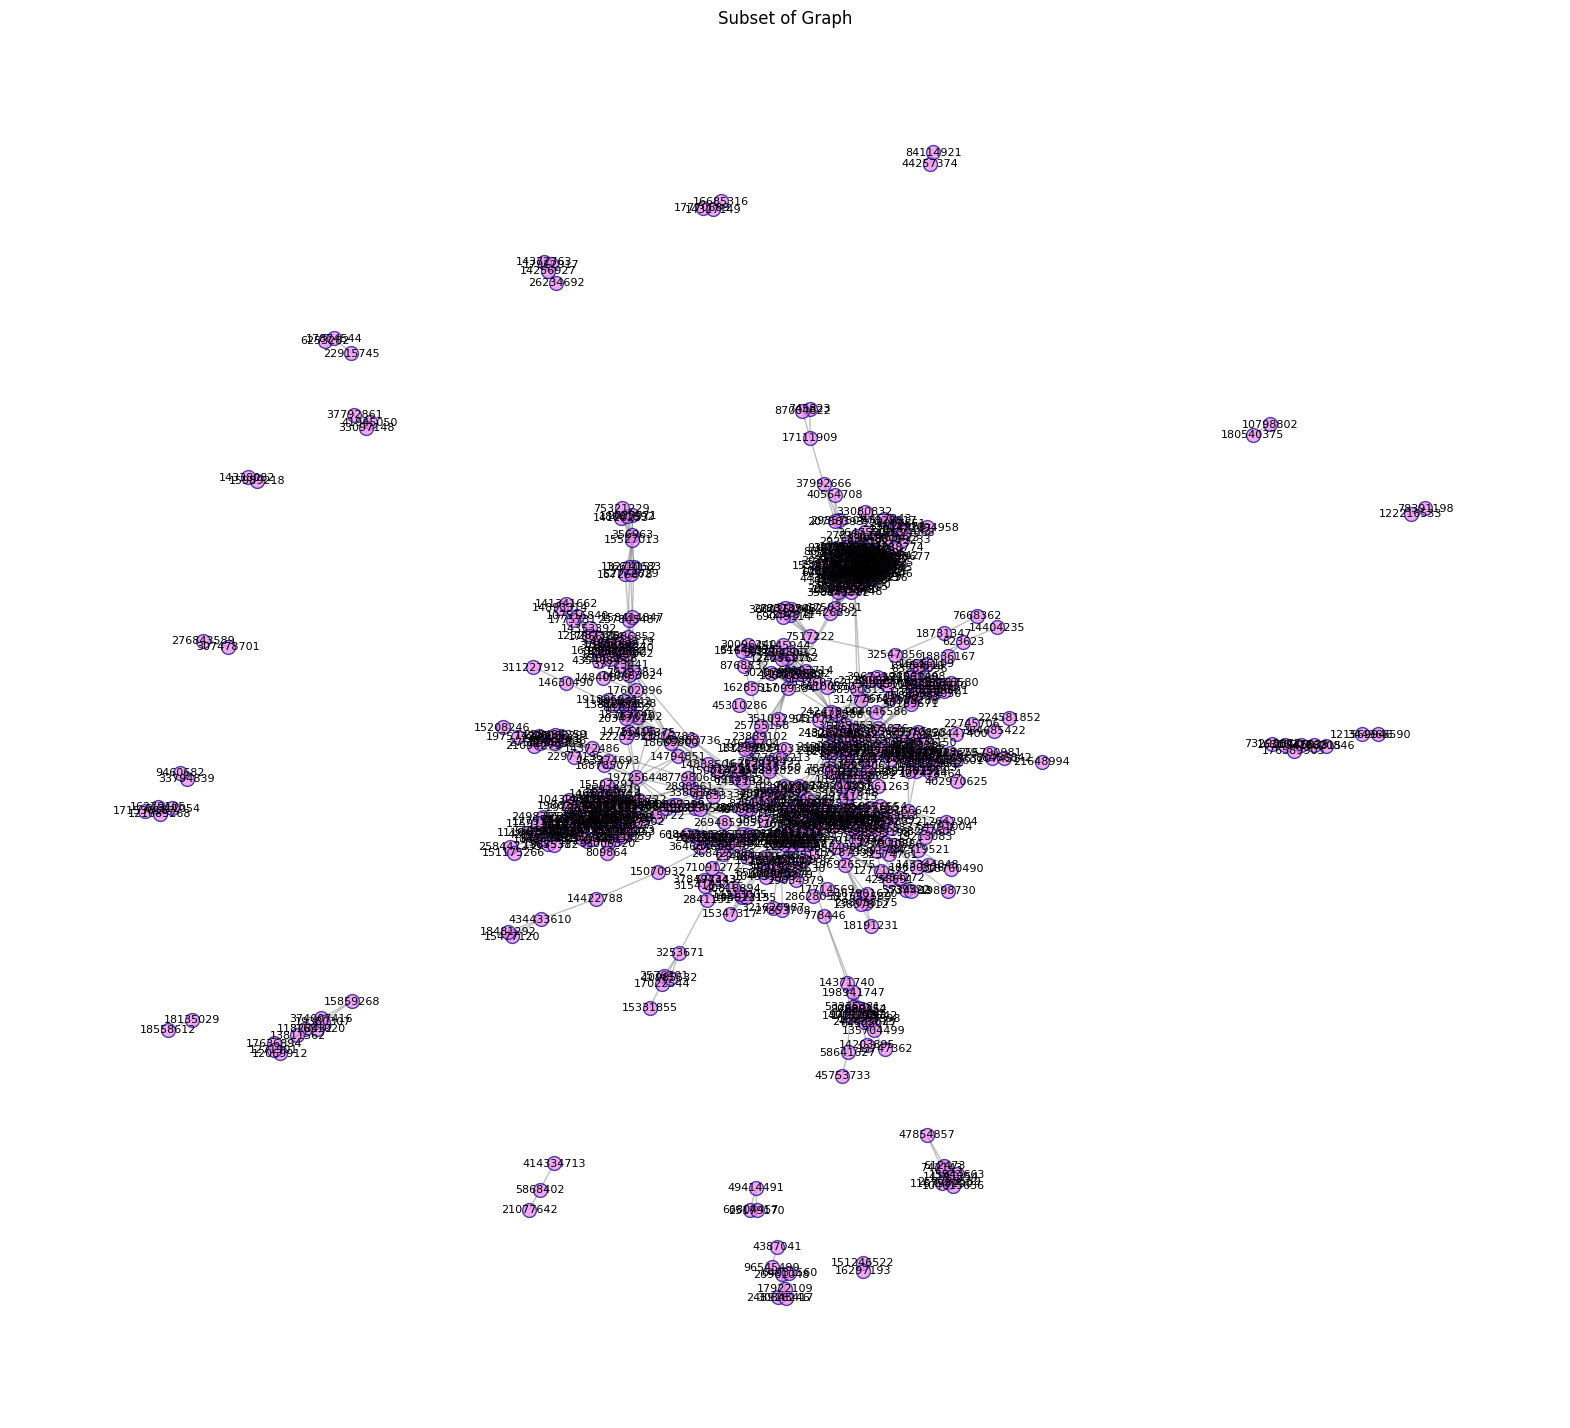

In [8]:
plt.figure(figsize=(20, 18))

# Draw nodes with custom style
nx.draw_networkx_nodes(subset_graph, pos, node_color='violet', node_size=100, alpha=0.7, edgecolors='darkblue')

# Draw edges with custom style
nx.draw_networkx_edges(subset_graph, pos, width=1.0, alpha=0.5, edge_color='gray')

# Draw labels for nodes
nx.draw_networkx_labels(subset_graph, pos, font_size=8, font_color='black')

plt.axis('off')
plt.title('Subset of Graph')
plt.show()

> > ### <font color='brown'><u> Data Preprocessing: Adjacency Matrix </u></font> <br>

In [9]:
# Get the number of node
nodes = set()

for edge in edges:
    nodes.add(edge[0])
    nodes.add(edge[1])
num_nodes = len(nodes)

# Create a dictionary to map node IDs to indices
node_to_index = {node: index for index, node in enumerate(nodes)}

# Create the adjacency matrix (sparse)
adjacency_matrix = lil_matrix((num_nodes, num_nodes), dtype=np.int8)
for edge in edges:
    source, target = edge
    source_index = node_to_index[source]
    target_index = node_to_index[target]
    adjacency_matrix[source_index, target_index] = 1

# Convert to a compressed sparse row (CSR) matrix for efficient computations
adjacency_matrix = adjacency_matrix.tocsr()
adjacency_matrix.shape

(654, 654)

> > ### <font color='brown'><u> Modeling: Spectral Clustering </u></font> <br>

In [10]:
# Create an instance of SpectralClustering
model = SpectralClustering(n_clusters=3, affinity='precomputed')

# Fit the model using the adjacency matrix
clusters = model.fit_predict(adjacency_matrix)

C:\Users\Thuong Nguyen\AppData\Roaming\Python\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:275: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
C:\Users\Thuong Nguyen\AppData\Roaming\Python\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


> > ### <font color='brown'><u> Metric Evaluation: Spectral Clustering </u></font> <br>

In [11]:
# Calculate the Silhouette score
silhouette = silhouette_score(adjacency_matrix, clusters)

# Print the assigned cluster labels and Silhouette score
print("Cluster Labels:", clusters)
print("Silhouette Score:", silhouette)

Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 

> ## <font color='green'><u> Method 2:</u> Feature-based Approach</font> <br>
> > ### <font color='brown'><u> Tabular represantation of data </u></font> <br>

In [12]:
hm = {}
for nodeId in nodeIds:
    file_path_featnames = "twitter/"+str(nodeId)+".featnames"
    file_path_egofeat = "twitter/"+str(nodeId)+".egofeat"  
    
    # Open the file in read mode
    with open(file_path_egofeat, "r") as file:
        # Read the entire contents of the file
        egofeat = file.read().split()
        
    with open(file_path_featnames, "r", encoding='utf-8') as file:
        # Read the entire contents of the file
        featnames_raw = file.readlines()

    index_ones = [ index for index,char in enumerate(egofeat) if char =='1' ]
    
    featurenames1=[]    
    for line in featnames_raw:
        starting_index = line.find(" ")
        ending_index = line.find('\n')
        featurenames1.append(line[starting_index+1:ending_index])    
    
    for index in index_ones:
        featurename = featurenames1[index]
        if featurename not in hm:
            hm[featurename]=[]
            hm[featurename].append(nodeId)
        else:
            hm[featurename].append(nodeId)
hm

{'#Notícia:': [100318079, 155661154, 186909156, 187773078, 355823615],
 '#xatiada': [100318079],
 '@19ester': [100318079],
 '@AvrilBrasil': [100318079, 165598423, 33612973],
 '@FCCrushParamore': [100318079, 248224845],
 '@ForLoveParamore:': [100318079, 188102842],
 '@HayleyBRCom': [100318079,
  152388029,
  179138862,
  187773078,
  19933035,
  229425177,
  248883350,
  265077741,
  31246395,
  70492333],
 '@HayleyBrasil': [100318079,
  179138862,
  187773078,
  250340951,
  292560337,
  307458983,
  46160500],
 '@LiveForHayley:': [100318079,
  158419434,
  186909156,
  200214366,
  40981798,
  86560711],
 '@O_ProfetaDiario:': [100318079],
 '@PAOCOMPARAMORE': [100318079, 216843160, 355823615, 65185224],
 '@Panetoni': [100318079, 45333725],
 '@ParamoreBEWARE': [100318079, 197903282, 528575851],
 '@Paramore_FC_BR': [100318079, 202195505, 216843160, 227650565, 229741646],
 '@SPINmagazine:': [100318079, 160237722, 187773078],
 '@TheParamoreBand': [100318079,
  151495845,
  160237722,
  166

In [13]:
df = pd.DataFrame(columns = ["nodeId"]+list(hm.keys()))
df["nodeId"]=nodeIds
df = df.fillna(0)
for item,value in hm.items():
    featurename = item
    nodes = value
    for node in nodes:
        df.loc[ df["nodeId"]==node ,featurename] = 1
df

,nodeId,#Notícia:,#xatiada,@19ester,@AvrilBrasil,@FCCrushParamore,@ForLoveParamore:,@HayleyBRCom,@HayleyBrasil,@LiveForHayley:,...,@ptscientists,@redbullracing,@shephallmassive,#RioCon,@DEADmatheus,@DEADmatheus:,@anthony2_,@ieroina:,@mishacollins:,@rocknrollbby_
0,100318079,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,10146102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,101859065,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,101903164,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,102765423,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,98345808,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
969,9855382,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
970,98633794,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
971,98801140,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Compute degree centrality
degree_centrality = nx.degree_centrality(graph)
print("Degree Centrality:", degree_centrality)

# Compute closeness centrality
closeness_centrality = nx.closeness_centrality(graph)
print("Closeness Centrality:", closeness_centrality)

# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(graph)
print("Betweenness Centrality:", betweenness_centrality)

Degree Centrality: {324201646: 0.004594180704441042, 40981798: 0.1332312404287902, 314316607: 0.033690658499234305, 430313102: 0.01990811638591118, 43003845: 0.1225114854517611, 187773078: 0.06584992343032159, 148519842: 0.013782542113323125, 195475105: 0.056661562021439515, 86799233: 0.0030627871362940277, 152388029: 0.016845329249617153, 158419434: 0.0444104134762634, 307458983: 0.04134762633996937, 18996905: 0.07503828483920368, 18951737: 0.03522205206738132, 265077741: 0.01225114854517611, 312284236: 0.007656967840735069, 189875309: 0.026033690658499236, 166214735: 0.021439509954058193, 355823615: 0.013782542113323125, 250340951: 0.015313935681470138, 248883350: 0.02756508422664625, 229425177: 0.018376722817764167, 206923844: 0.033690658499234305, 59588845: 0.006125574272588055, 70492333: 0.030627871362940276, 160237722: 0.022970903522205207, 222090651: 0.006125574272588055, 57828817: 0.0030627871362940277, 179138862: 0.016845329249617153, 102765423: 0.0030627871362940277, 11522138

In [15]:
df["Degree Centrality"]=np.nan
df["Closeness Centrality"]=np.nan
df["Betweenness Centrality"]=np.nan

C:\Users\Thuong Nguyen\AppData\Local\Temp\ipykernel_19684\2905337359.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Degree Centrality"]=np.nan
C:\Users\Thuong Nguyen\AppData\Local\Temp\ipykernel_19684\2905337359.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Closeness Centrality"]=np.nan
C:\Users\Thuong Nguyen\AppData\Local\Temp\ipykernel_19684\2905337359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

In [16]:
for item,value in degree_centrality.items():
    df.loc[df["nodeId"]==item, "Degree Centrality"]=value
for item,value in closeness_centrality.items():
    df.loc[df["nodeId"]==item, "Closeness Centrality"]=value
for item,value in betweenness_centrality.items():
    df.loc[df["nodeId"]==item, "Betweenness Centrality"]=value

In [17]:
df.dropna(inplace=True)
df.to_csv("dataset.csv",index=False)

> > ### <font color='brown'><u> Clustering and Evaluatoin:  </u></font> <br>

In [18]:
def cluster_and_evaluate(model_type, num_clusters, data, **kwargs):
    """
    Cluster the data using the specified model and evaluate the clustering results.
    
    Args:
        model_type (str): Type of clustering model to use. Valid options: "k-means", "hierarchical", "spectral".
        num_clusters (int): Number of clusters.
        data (numpy.ndarray or pandas.DataFrame): Input data to be clustered.
        **kwargs: Additional keyword arguments specific to the chosen model.
        
    Returns:
        tuple: A tuple containing the following elements:
            - labels (numpy.ndarray): Cluster labels assigned to each data point.
            - evaluation_metrics (dict): Dictionary of evaluation metrics, such as silhouette score and adjusted rand index.
    """
    if model_type == "k-means":
        model = KMeans(n_clusters=num_clusters, **kwargs)
    elif model_type == "hierarchical":
        model = AgglomerativeClustering(n_clusters=num_clusters, **kwargs)
    elif model_type == "spectral":
        model = SpectralClustering(n_clusters=num_clusters, **kwargs)
    else:
        raise ValueError("Invalid model type. Valid options: 'k-means', 'hierarchical', 'spectral'.")

    # Fit the model and obtain the predicted labels
    labels = model.fit_predict(data)
    
    # Evaluate the clustering results
    evaluation_metrics = {
        "Silhouette Score": metrics.silhouette_score(data, labels),
    }
    
    return labels, evaluation_metrics


> > ### <font color='brown'><u> K-MEANS  </u></font> <br>

In [19]:
data=df
# Cluster the data using k-means with 3 clusters
labels, metricss = cluster_and_evaluate("k-means", 3, data, random_state=42)

# Print the labels and evaluation metrics
print("Cluster Labels:", labels)
print("Evaluation Metrics:")
for metric, value in metricss.items():
    print(metric + ":", value)

Cluster Labels: [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1
 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 2 2 2
 2 2 2 1 2 2 1 1 2 1 2 1 2 2 1 1 2 1 2 2 2 2 1 2 2 2 2 2 1 2 1 1 2 1 2 1 2
 2 1 2 2 1 1 2 2 2 2 1 2 1 1 1 1 2 2 2 2 1 2 2 1 2 2 2 1 1 2 1 1 2 2 1 2 2
 2 1 2 1 1 1 2 1 1 2 1 2 1 2 1 2 1 1 2 2 1 2 1 2 1 2 1 2 2 1 1 2 1 2 2 2 1
 1 1 2 1 

> > ### <font color='brown'><u> Hierarchical Clustering  </u></font> <br>

In [20]:
data=df
# Cluster the data using k-means with 3 clusters
labels1, metricss1 = cluster_and_evaluate("hierarchical", 3, data)

# Print the labels and evaluation metrics
print("Cluster Labels:", labels1)
print("Evaluation Metrics:")
for metric, value in metricss1.items():
    print(metric + ":", value)

Cluster Labels: [0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 2 0 0 0 2 2 0 0 0 0 0 2 0 2 2 0
 0 2 0 0 0 0 0 0 2 2 0 0 2 2 0 0 0 2 2 2 2 0 0 0 0 0 2 0 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 0 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 0 0 2
 2 0 2 2 2 0 0 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 0 0 2 2 2 0 2 0 2 0 2
 0 2 0 2 2 0 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2
 2 2 0 2 2 0 0 2 2 2 2 0 2 2 0 2 2 0 2 2 0 0 0 0 2 2 2 0 2 0 2 2 0 0 2 2 0
 2 2 0 0 2 2 2 2 2 2 0 2 2 2 0 2 0 0 2 0 0 0 0 2 0 2 2 0 0 2 2 2 0 0 0 2 2
 2 2 0 2 0 2 0 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2 2 0 0 2 1 2 1 1 2 2 1 1 1
 2 2 2 1 2 2 1 2 1 1 1 1 1 1 1 2 2 1 2 1 2 2 1 2 1 1 2 1 1 1 1 1 2 2 1 1 1
 1 1 1 2 1 1 2 2 1 2 1 2 1 1 2 2 1 2 1 1 1 1 2 1 1 1 1 1 2 1 2 2 1 2 1 2 1
 1 2 1 1 2 2 1 1 1 1 2 1 2 2 2 2 1 1 1 1 2 1 1 2 1 1 1 2 2 1 2 2 1 1 2 1 1
 1 2 1 2 2 2 1 2 2 1 2 1 2 1 2 1 2 2 1 1 2 1 2 1 2 1 2 1 1 2 2 1 2 1 1 1 2
 2 2 1 2 

> > ### <font color='brown'><u> Spectral Clustering  </u></font> <br>

In [21]:
data=df
# Cluster the data using k-means with 3 clusters
labels2, metricss2 = cluster_and_evaluate("spectral", 3, data, random_state=42)

# Print the labels and evaluation metrics
print("Cluster Labels:", labels2)
print("Evaluation Metrics:")
for metric, value in metricss2.items():
    print(metric + ":", value)

C:\Users\Thuong Nguyen\AppData\Roaming\Python\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Cluster Labels: [0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 2 1 0 1 0 1 0 0 0 0 0 2 1 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0
 0 0 2 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 1 0 1
 0 1 0 2 1 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 1 0 0 0 2 0 2 0 0 0 2 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 1 1 0 0 2 2 0 0 1 1 0 0 0 0 2 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 0
 2 0 0 0 0 0 0 2 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0
 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 2 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 2 0 0 0 0 0 1 0 1 0 0 0 2 0 0 1 0 0 2 2 0 0 0
 0 0 0 1 0 0 2 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 2 0 2 0 0 0 0 0 0 1 0 2 2 0 0
 0 0 0 0 

> > ### <font color='brown'><u> Labeling  </u></font> <br>

In [22]:
#taking labels of the best performing model: KMEANS 
df["class"] = labels
df0 = df.loc[df["class"]==0]
df1 = df.loc[df["class"]==1]
df2 = df.loc[df["class"]==2]

C:\Users\Thuong Nguyen\AppData\Local\Temp\ipykernel_19684\1092220494.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["class"] = labels


> > ### <font color='brown'><u> Music Enthusiasts Cluster</u></font> <br>

<Axes: xlabel='0'>

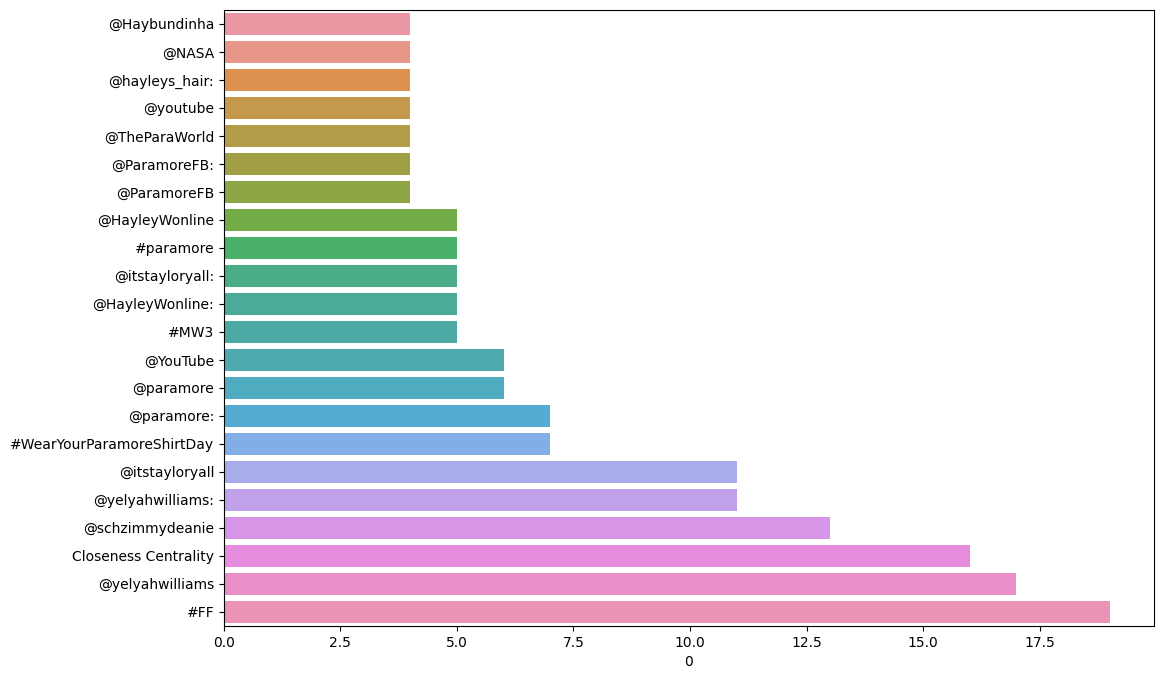

In [23]:
df_0_sum = ((df0.sum().sort_values()/df0.shape[0])*100).astype(int).to_frame()
n0 = df_0_sum.shape[0]
df_0_sum.loc[(20>df_0_sum[0]) & (df_0_sum[0]>2),]
plt.figure(figsize=(12,8))
sns.barplot(y=df_0_sum.loc[(22>df_0_sum[0]) & (df_0_sum[0]>3),].index, x=df_0_sum.loc[(22>df_0_sum[0]) & (df_0_sum[0]>3),][0], orient='h')
#Music

> > ### <font color='brown'><u> Social Media Enthusiasts Cluster</u></font> <br>

<Axes: xlabel='0'>

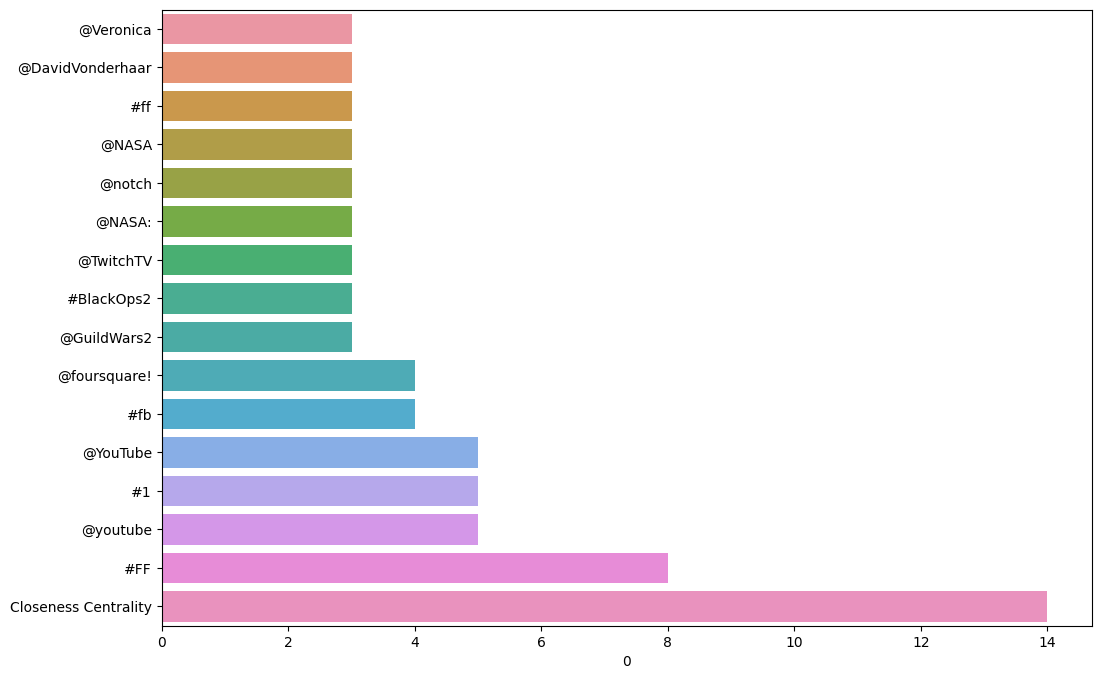

In [24]:
df_1_sum = ((df1.sum().sort_values()/df1.shape[0])*100).astype(int).to_frame()
n1 = df_1_sum.shape[0]
serie1 = df_1_sum.loc[(20>df_1_sum[0]) & (df_1_sum[0]>2),]
plt.figure(figsize=(12,8))
sns.barplot(
    y=serie1.index,
    x=serie1[0], orient='h')

#Social Media


> > ### <font color='brown'><u> Gaming Enthusiasts Cluster </u></font> <br>

<Axes: xlabel='0'>

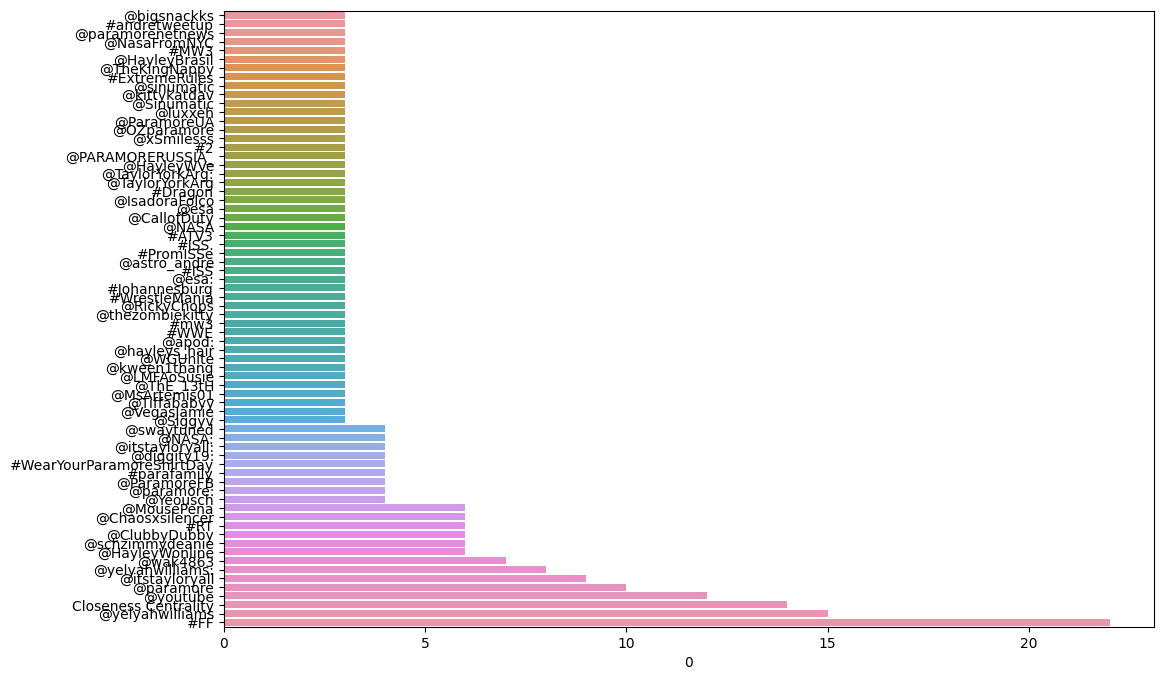

In [25]:
df_2_sum = ((df2.sum().sort_values()/df2.shape[0])*100).astype(int).to_frame()
n2 = df_2_sum.shape[0]
serie2 = df_2_sum.loc[(23>df_2_sum[0]) & (df_2_sum[0]>2),]
plt.figure(figsize=(12,8))
sns.barplot(
    y=serie2.index,
    x=serie2[0], orient='h')

#Gaming